


#  심벌 테이블(Symbol Table)

- 은 컴파일 타임과 런타임 모두에서 메모리와 프로그램의 구조를 효율적으로 관리하기 위해 설계되었습니다. 
- Rust는 정적 분석과 메모리 안전성을 보장하기 위해 이러한 요소들을 철저하게 관리합니다.



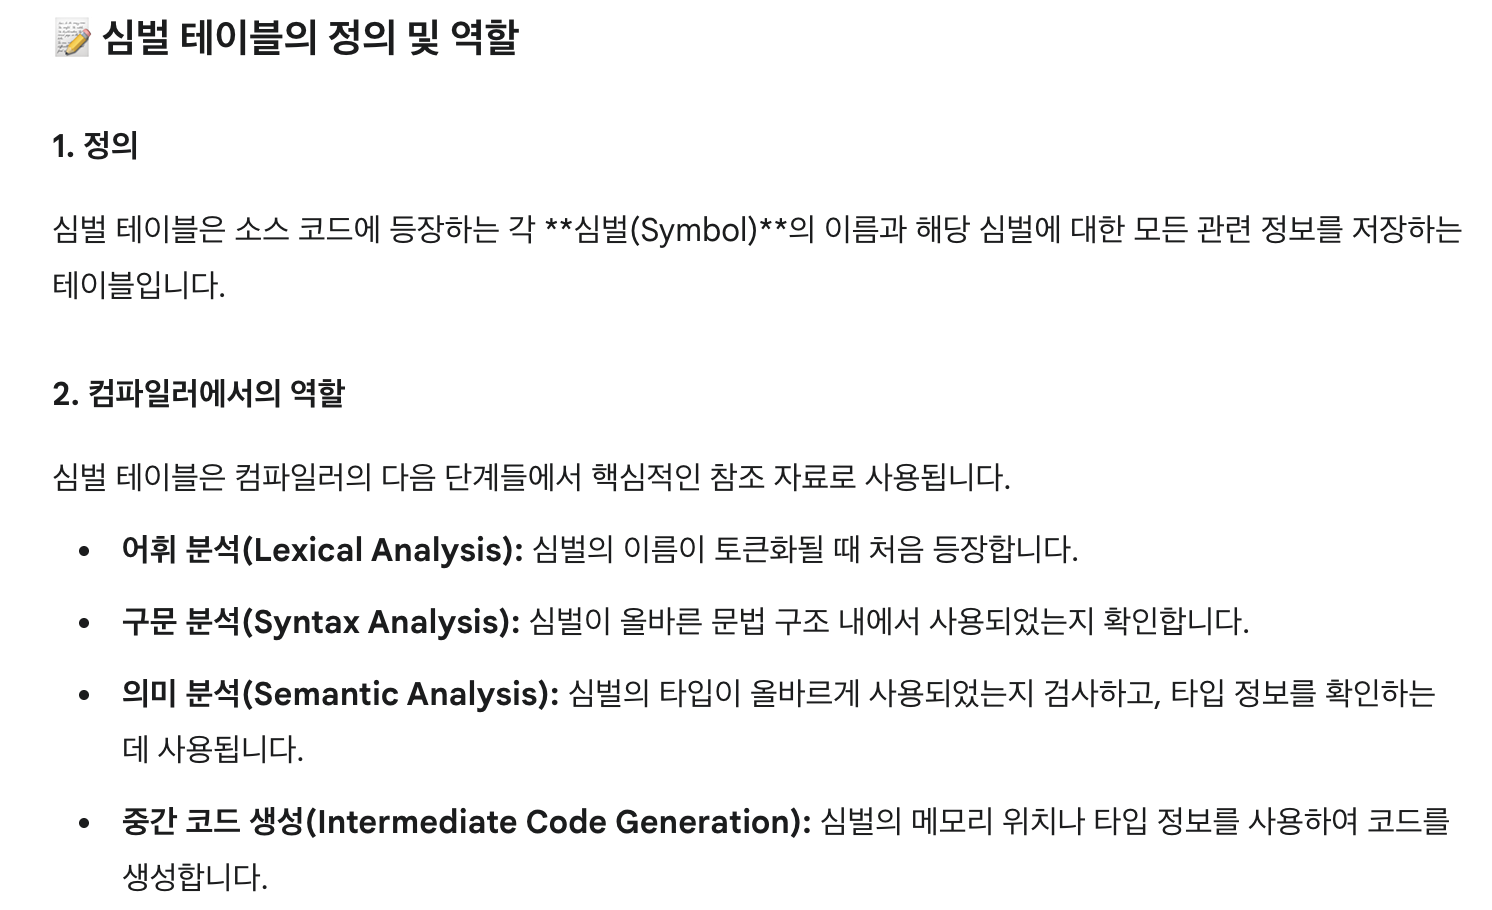

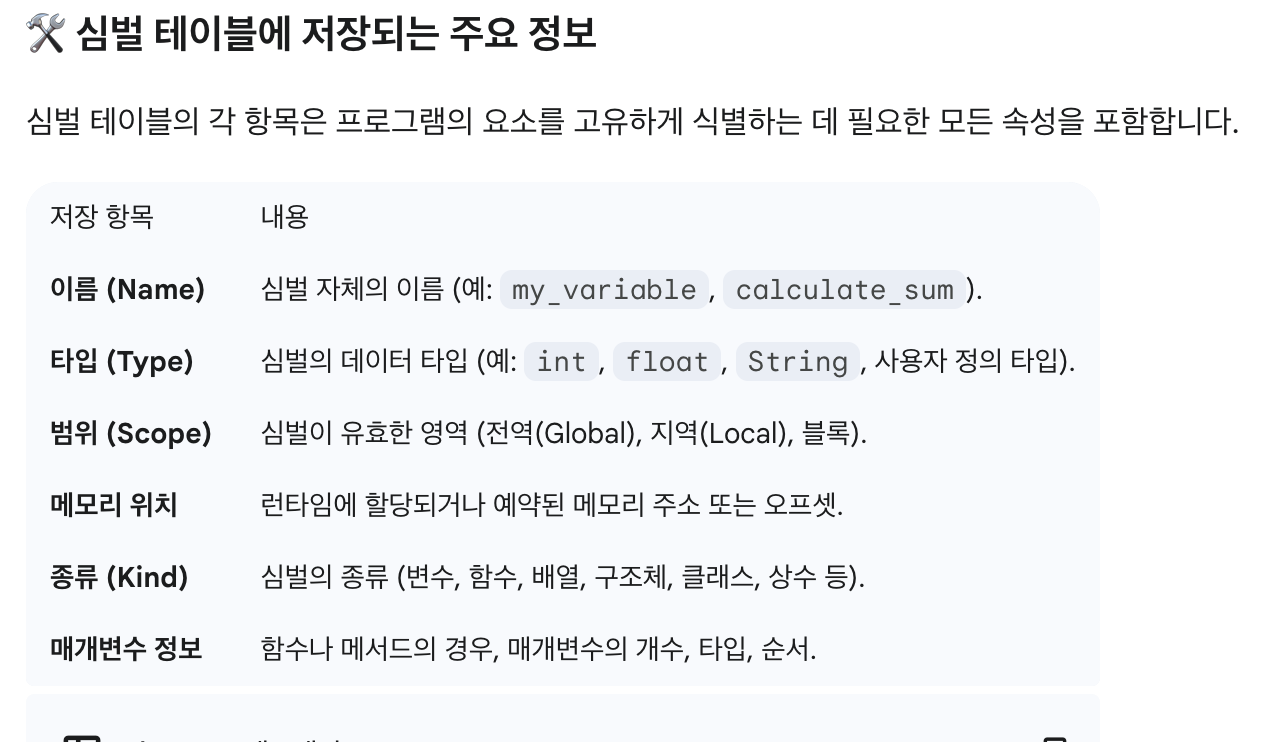

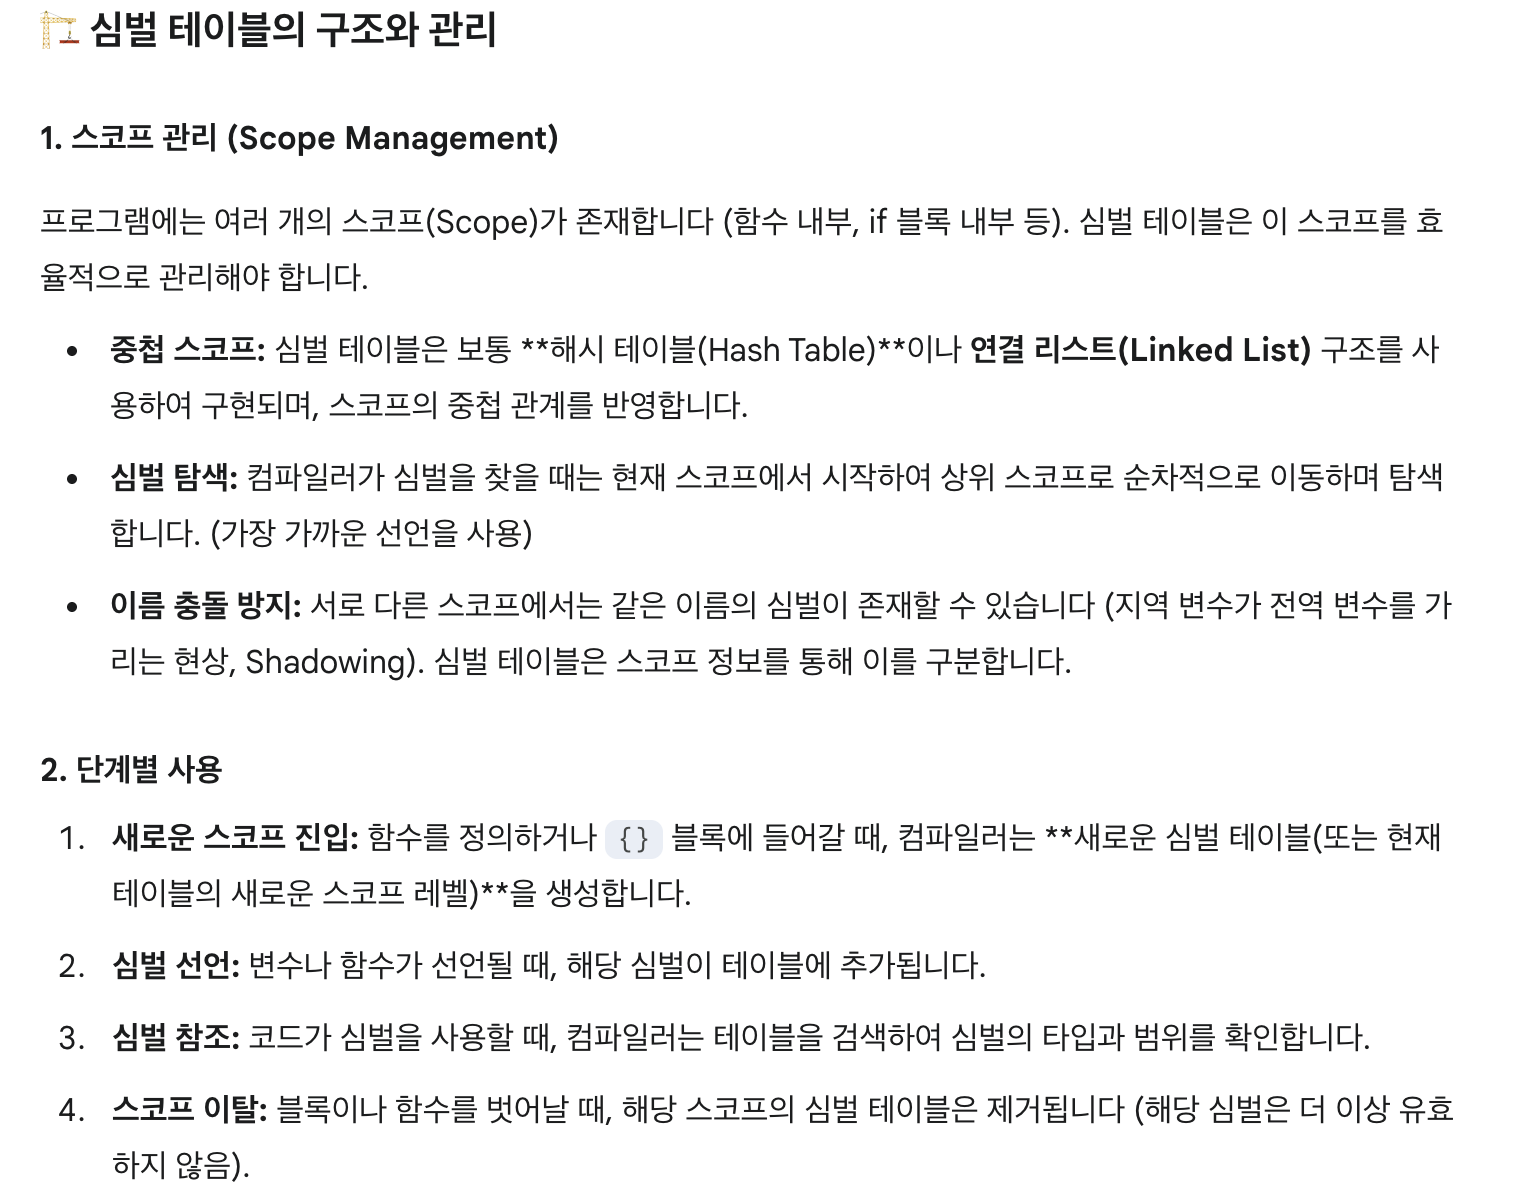

## 메모리 구성
- Rust는 매우 철저하게 메모리를 관리하며, 크게 **스택(stack)**과 **힙(heap)**이라는 두 가지 메모리 영역에서 동작합니다.

- 스택(Stack):

> 고정 크기의 데이터(예: 기본 자료형, 고정 크기 배열)가 스택에 저장됩니다.
> LIFO(Last-In-First-Out) 방식으로 빠르게 할당되고 해제됩니다.
> 스택 메모리에서의 변수는 함수 호출과 함께 생성되고, 해당 함수의 실행이 끝나면 자동으로 해제됩니다.


- 힙(Heap):

> 동적으로 크기가 변하는 데이터(예: Vec<T>, Box<T>, String)는 힙에 저장됩니다.
> 힙에 할당된 데이터는 수동으로 할당되고 해제되며, Rust는 소유권 시스템과 스마트 포인터(예: Box<T>, Rc<T>, Arc<T>)를 통해 이를 관리합니다.
> 힙 메모리는 런타임 동안 계속 사용할 수 있으며, Rust는 스코프 종료 시 자동으로 메모리를 해제하는 방식으로 메모리 누수를 방지합니다.

# 1. 소유자(Owner)와 소유권(Owership) 알아보기 

## 소유권 및 메모리 안전성
- Rust의 메모리 모델은 소유권(ownership), 차용(borrowing), 그리고 수명(lifetime) 개념을 중심으로 작동합니다. 
- 이 시스템은 런타임에 비용을 추가하지 않으면서도 컴파일 타임에 메모리 접근을 철저하게 검사하여 메모리 안전성을 보장합니다.

> 소유권: 각 값은 고유한 소유자가 있으며, 값은 한 번에 하나의 소유자만 가질 수 있습니다.
> 차용: 값을 소유하지 않고 참조하는 방식으로, 불변 참조(&T)와 가변 참조(&mut T)가 있습니다.
> 수명: 참조는 유효한 메모리 위치에만 접근할 수 있으며, Rust는 컴파일 타임에 참조의 유효 기간을 검사하여 메모리 오류를 방지합니다.

## 메모리 해제
- Rust는 **가비지 컬렉터(GC)**가 없는 언어이므로, 메모리 관리는 컴파일러가 소유권과 수명을 추적하여 스코프가 종료되면 자동으로 메모리를 해제합니다. 
- 이는 RAII(Resource Acquisition Is Initialization) 원칙을 기반으로 하며, drop 메서드가 호출되어 자원을 해제합니다.

## 1-1 소유자는 변수이고 소유 대상은 값에 있다. 이를 변수가 소유권을 가진다고 한다
- 원시 자료형의 값은 스택에 생기므로 소유자인 변수가 가르치는 값은 항상 복사되어 변수이 새로운 소유자가 됨 


### 변수 정의
-  소유자에게 소유권이 할당된다. 
- 변수를 정의할 때는 let과 let mut으로 지정한다. 이때 값이 할당되어 소유권을 가진다.  

### 소유권의 유효범위
- 변수를 블럭단위로 정의하므로 변수의 유효범위는 해당 블럭이다. 이를 스코프라고 한다.

### 1-1-1 원시자료형의 값은 항상 소유자를 가질 수 있다. 

- 변경 불가 및 변경 가능한 변수 즉 소유자를 지정할 수 있다

In [2]:
let x = 100;
let mut y = 100;

### 1-1-2 소유권이 이동인가 복사인가?

- 원시 자료형은 스택 메모리에만 구성되어서  소유권이 이동이 아니라 복사가 발생해서 새로운 소유자인 변수가 생깁니다.

- 소유권 이동과 새로운 소유권이 생기는 것이 차이는 기존 변수가 사용할 수 없다는 것입니다.

In [3]:
let z = x;

###  복사로 새로운 소유권이 생겨 변수 x를 그대로 사용할 수 있습니다.

- 복사만 되기때문에 여러 곳에 복사해서 이동시킴
- 즉 새로운 것에 대한 소유자를 만든다. 

In [4]:
x

100

### 1-1-3  힙 메모리에 생성된 값에 대한 소유권

-  힙 메모리에 생기는 객체의 소유자가 변수이므로 이는 스택에 생긴다.

-  그러나 힙에도 소유자를 가질 수 있다. 

- 소유권 이동이 발생하는 경우는 레퍼런스 즉 포인터로 처리되는 경우

- 이런 경우는 실제 데이터를 힙에서 관리한다. =>  원시자료형은 고정이기 때문에 스택에서 관리 

#### String 문자열은 값을 힙에 생성하고 이 값의 주소를 변수에 할당하면서 소유권이 생김  

- 곧 소유권을 생성

In [4]:
let xx = String::from("문자열"); 

#### 복제는 새로운 소유권을 만듬 

- Box는 힙에 값의 가르치는 스마트 포인터 

-  복제는 힙의 메모리에 새롭게 만든다.
- 복사와 복제는 다르다.  보통 복사는 스택에서 생기고 복제는 힙에서 생긴다.

In [5]:
let a = Box::new(xx.clone());
let mut b = Box::new(xx.clone());

## 1-2 소유권 시스템의 규칙

### 소유자는 유일해야 함 
- 각 값은 해당 값의 소유자가 있습니다.
- 한 번에 하나의 소유자만이 해당 값의 소유자가 될 수 있습니다.

### 소멸되는 이유 
- 소유자는 값의 생명주기 동안 유효합니다.
- 소유자가 범위를 벗어나면 해당 값은 소멸됩니다.

### 나머지 사용은 참조에 의해 빌림
- 값에 대한 참조(빌림)는 소유권을 이전하지 않습니다.


### 1-2-1 소유자는 유일해야 함
- 각 값은 해당 값의 소유자가 있습니다.
- 한 번에 하나의 소유자만이 해당 값의 소유자가 될 수 있습니다.


In [3]:
let owner_1 = String::from("문자열"); 

In [4]:
let owner_2 = owner_1;

#### 소유권 이전되면 더 이상 이 변수는 사용할 수 없음 

-  소유권이 이동하면 해당 소유자인 변수는 다시 사용할 수 없음
-  소유권이 없어진 변수를 사용하려면 다시 소유권을 생성시켜야 함 

In [5]:
owner_1

Error: cannot find value `owner_1` in this scope

### 1-2-2 소멸되는 이유 

- 소유자가 가진 값이 없이지면 해당 메모리를 정리해야 함 이를 소멸이라고 함
  
- 소유자는 값의 생명주기 동안 유효합니다.
- 소유자가 범위를 벗어나면 해당 값은 소멸됩니다.

### 변수의 범위는 스코프 내에서 까지만

- 변수 즉 소유자를 관리하는 스코프의 가장 작은 단위를 블럭임 

- 변수가 소유자이기 때문에 스코프 범위까지만 사용이 가능

In [13]:
{ 
     let owner_3 = String::from("문자열"); 
}

owner_3;

Error: cannot find value `owner_3` in this scope

## 1-3  소유권 시스템 :  소유자는 유일 


### 원시타입에 대한 값의 유일성

- 변경이 불가하므로 유일한 값을 처리하기 위해서 메모리에 새롭게 복사함
- 새로운 메모리를 생성하므로 유일값을 유지 => 별도의 주소 생김  


In [10]:
fn main() {
    let x = 5;                        // x는 5의 소유자입니다.
    let y = x;                        // x의 값을 y에 대입하여 y가 5의 소유자가 됩니다.
    println!("x = {}, y = {}", x, y); // x와 y 모두 5의 소유자입니다.
}

main();

x = 5, y = 5


### 힙 메모리 값의 유일성 

- 실제 메모리에 저장된 값이 주소(포인터)이므로 다른 소유자의 변수가 관리하는 메모리로 복사
- 한번 생성된 주소값은 다른 소유자로 전달되면서 유일성을 유지 

 

In [9]:
fn main() {
    let x = String::from("hello");  // x는 String 값 "hello"의 소유자입니다.
    let y = x;                      // x의 소유권이 y로 이전됩니다.
    // println!("x = {}", x);       // 에러! x의 소유권은 이전되었기 때문에 사용할 수 없습니다.
    println!("y = {}", y);          // y는 "hello"의 소유자입니다.
}

main();

y = hello


##  1-4 소유자의 소유권을 유지기간은 생성되는 블럭 내부까지 

- 변수가 생성되면 스코프 유지
- 변수는 모듈, 함수, 블럭 등에서 생성되면 그 범위내에서만 유일성을 유지
- 범위를 벗어나면 더 이상 사용할 수 없다는 뜻이다. 



In [7]:
fn main() {
    let s1 = String::from("hello");       // s1이 String 타입의 값을 소유.
    {
        let s2 = &s1;                     // s1의 참조가 s2 변수에 할당  참조 대여가 발생함 

        println!(" 참조 처리 = {}", s2);               // s2는 여전히 값을 소유, "hello"가 출력.
    }                                     // s2가 소멸됨 
    
    println!("소유자는 그래도 = {}", s1);  
}                                         // 함수가 종료되면 s1가 스코프를 벗어나서, 소유하던 값의 메모리가 해제.

main();

 참조 처리 = hello
소유자는 그래도 = hello


### 변수가 지정한 스코프 단위로 소유권 유지

- 더 범위가 큰 변수를 특정 블럭 내에 변수에 할당하면 소유권이 이동
- 로컬 블럭 내에서 다시 이동을 안하면 소유권을 가진 변수는 유효범위까지 소유권을 유지한다. 


In [8]:
fn main() {
    let x = String::from("Hello");      // x는 스코프에 들어감
    if true {
        let y = x;                      // x의 소유권이 y로 이전됨
        println!("{}", y);              // "Hello" 출력
    }                                   // y가 범위를 벗어남
    println!("{}", x);                  // 소유권을 잃은 변수는 더 사용할 수 없어 컴파일 오류 발생
}

Error: borrow of moved value: `x`

### 소유권을 유지하려면 참조(빌림을 사용해야 함

In [12]:
fn main() {
    let x = String::from("Hello");       // x는 스코프에 들어감
    if true {
        let y = &x;                      // x의 값을  y가 빌림 
        println!("{}", y);               // "Hello" 출력
    }                                    // y가 범위를 벗어남
    println!("{}", x);                   // 소유권이 유지되어 X 값을 출력함
}

main();

Hello
Hello


## 2  소유권에 대한 이동 알아보기 


### 소유권 연관관계

- 스택 내부에서 저장된 값과 주소를 어떻게 관리할 지를 결정하는 것이 소유권과 연관

### 소유권 이동
- 스택 내부의 포인터(레퍼런스) 값이 복사되어 새로은 심벌과 연결되어 
- 기본 심벌을 더 이상 사용 못하도록 만든다. 
- 그래서 실제 사용할 수 있는 심벌이 새롭게 결정된다. 

## 2-1 소유권 이동 이해하기

### 값에 대한 소유권은 변수를 지정하면서 생성된다. 

- 소유권을 변수에 할당하는 것을 이동(move) 라고한다.
- 이 말은 변수에 레퍼런스를 저장하는 것이다. 
- 실제 값은 heap 메모리에 생기고 그것을 변수에 할당해서 소유권을 확정하기 때문이다.
- 예외 대상은 스택 메모리에 관리하는 원시값들이다. 이 값은 이동되면 동일한 값을 새로운 변수가 사용할 수 있다. 


In [5]:
fn main() {
    let s1: String = String::from("Hello!");
    println!(" s1= {}",s1 );
}

main();

 s1= Hello!


### 소유권에는 하나의 소유자만 있어야 한다.

- 기존 변수에 할당해서 소유권을 확정했지만 
-  또 다른 변수에 기존 변수의 값을 할당하면 소유권이 옮겨간다. 
- 이것도 이동(move)이다. 그래서 기존 변수는 수명이 종료된다. 

In [37]:
fn main() {
    let s1: String = String::from("Hello!");
    let s2: String = s1;
    println!("s2: {s2}");
    println!("s1: {s1}");
}

Error: borrow of moved value: `s1`

### 소유권이 사라진 변수를 다시 사용할 수 없다.

In [6]:
fn main() {
    let s1: String = String::from("Hello!");
    let s2: String = s1;
    println!("s2: {s2}");
    //println!("s1: {s1}");
}

main();

s2: Hello!


## 2-2 소유권을 새로 생성하기 

### 새로운 변수에 소유권을 지정하려면 복제가 필수이다. 

- 이때는 clone 메서드를 사용한다.  

In [7]:
fn main() {
    let s1: String = String::from("Hello!");
    let s2: String = s1.clone();
    println!("s2: {s2}");
    println!("s1: {s1}");
}

main();

s2: Hello!
s1: Hello!


## 2-3 변수에 소유권을 변경하도록 지정하기 

### 변수에 mut으로 가변변수를 지정하면 값에 대한 소유권이 변경

-  가변 변수는 값을 변경할 수 있어서 새로운 값을 가지므로 소유권을 변경할 수 있다. 

In [8]:
fn main() {
    let mut s1: String = String::from("Hello!");
    println!("s1: {s1}");
    s1 = String::from("World!");
    println!("s1: {s1}");
}

main();

s1: Hello!
s1: World!
